In [1]:
import pandas as pd
import os

In [2]:
def load_and_label_data(folder_path, label, columns_to_remove=None):
    sequences = []
    
    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            # CSV 파일을 로드
            filepath = os.path.join(folder_path, filename)
            df = pd.read_csv(filepath)
            
            # 필요 없는 컬럼 제거
            if columns_to_remove:
                df.drop(columns=columns_to_remove, inplace=True)

            # DataFrame과 레이블을 튜플로 저장
            sequences.append((df, label))
    
    return sequences

In [3]:
columns_to_remove = ["nose-conf", "left-eye-conf", "right-eye-conf", "left-ear-conf", "right-ear-conf", "left-shoulder-conf", "right-shoulder-conf", "left-elbow-conf", "right-elbow-conf", "left-hand-conf", "right-hand-conf", "left-hip-conf", "right-hip-conf", "left-knee-conf", "right-knee-conf", "left-foot-conf", "right-foot-conf"]

In [4]:
parkinson_sequences = load_and_label_data("C:/jihoon/walking_dataset_withcsv/parkinson", 0, columns_to_remove)
limping_sequences = load_and_label_data("C:/jihoon/walking_dataset_withcsv/limping", 1, columns_to_remove)
normal_sequences = load_and_label_data("C:/jihoon/walking_dataset_withcsv/normal", 2, columns_to_remove)

all_sequences = parkinson_sequences + limping_sequences + normal_sequences

In [4]:
parkinson_sequences = load_and_label_data("/Users/jihoon/venvs/skeleton-rnn/walking_dataset_withcsv/parkinson", 0, columns_to_remove)
limping_sequences = load_and_label_data("/Users/jihoon/venvs/skeleton-rnn/walking_dataset_withcsv/limping", 1, columns_to_remove)
normal_sequences = load_and_label_data("/Users/jihoon/venvs/skeleton-rnn/walking_dataset_withcsv/normal", 2, columns_to_remove)

all_sequences = parkinson_sequences + limping_sequences + normal_sequences

In [5]:
all_sequences

[(          nose-x       nose-y   left-eye-x   left-eye-y  right-eye-x  \
  0    1640.765427  1001.122040  1652.949249   991.098228  1646.052826   
  1    1600.238403   993.187775  1611.536728   982.314766  1606.944733   
  2    1649.612701  1012.943954  1658.838684   999.474632  1649.444275   
  3    1640.742645  1013.150887  1641.238464   999.229019  1643.798187   
  4    1630.034103  1016.890434  1632.069626  1004.006180  1636.213791   
  ..           ...          ...          ...          ...          ...   
  403   332.656816   680.685841   332.485747   671.064034   331.137372   
  404   341.571198   692.332527   340.558084   681.191095   341.088711   
  405   330.325912   703.322773   331.354206   693.411131   327.423069   
  406   334.791238   796.464302   334.146452   791.504623   334.086088   
  407   330.000000   797.139414   330.646460   789.812023   330.000000   
  
       right-eye-y   left-ear-x   left-ear-y  right-ear-x  right-ear-y  ...  \
  0     986.208366  1701.71328

In [5]:
from sklearn.model_selection import train_test_split

# 시퀀스와 레이블 분리
data, labels = zip(*all_sequences)

# # 학습과 테스트 데이터셋으로 분할 (예: 90% 학습, 10% 테스트)
# X_temp, X_test, y_temp, y_test = train_test_split(data, labels, test_size=0.1, random_state=0)

# # 학습 데이터셋을 다시 학습과 검증 데이터셋으로 분할 (예: 80% 학습, 20% 검증)
# X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=0)

# 테스트 셋 없이 학습 데이터셋과 검증 데이터셋만 분할
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=0)

In [6]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.layers import Dropout, BatchNormalization
import numpy as np

# model = Sequential([
#     # RNN 레이어
#     SimpleRNN(50, return_sequences=True, input_shape=(None, X_train[0].shape[1])),
#     SimpleRNN(50),
#     # 분류를 위한 Dense 레이어
#     Dense(3, activation='softmax')
# ])

model = Sequential([
    LSTM(512, return_sequences=True, input_shape=(None, X_train[0].shape[1])),
    Dropout(0.3),
    LSTM(256, return_sequences=True),
    Dropout(0.3),
    LSTM(128, return_sequences=True),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    # BatchNormalization(),
    # Dense(3),
    Dense(3, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 데이터를 numpy 배열로 변환
X_train = [x.to_numpy() for x in X_train]
X_val = [x.to_numpy() for x in X_val]
y_train = np.array(y_train)
y_val = np.array(y_val)

# 패딩 처리
X_train_padded = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post', dtype='float32')
X_val_padded = tf.keras.preprocessing.sequence.pad_sequences(X_val, padding='post', dtype='float32')

print("X_train_padded shape:", X_train_padded.shape)
print("X_val_padded shape:", X_val_padded.shape)

X_train_padded shape: (84, 632, 34)
X_val_padded shape: (21, 643, 34)


In [7]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.layers import Dropout, BatchNormalization
import numpy as np

# model = Sequential([
#     # RNN 레이어
#     SimpleRNN(50, return_sequences=True, input_shape=(None, X_train[0].shape[1])),
#     SimpleRNN(50),
#     # 분류를 위한 Dense 레이어
#     Dense(3, activation='softmax')
# ])

model = Sequential([
    LSTM(512, return_sequences=True, input_shape=(None, X_train[0].shape[1])),
    Dropout(0.3),
    LSTM(256, return_sequences=True),
    Dropout(0.3),
    LSTM(128, return_sequences=True),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    # BatchNormalization(),
    # Dense(3),
    Dense(3, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 데이터를 numpy 배열로 변환
X_train = [x.to_numpy() for x in X_train]
X_val = [x.to_numpy() for x in X_val]
y_train = np.array(y_train)
y_val = np.array(y_val)

# 패딩 처리
X_train_padded = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post', dtype='float32')
X_val_padded = tf.keras.preprocessing.sequence.pad_sequences(X_val, padding='post', dtype='float32')

# 검증 손실을 기준으로 최적의 모델 저장
checkpoint_loss = ModelCheckpoint('best_model_loss.h5', monitor='loss', verbose=1, save_best_only=True, mode='min')

# 검증 정확도를 기준으로 최적의 모델 저장
checkpoint_acc = ModelCheckpoint('best_model_acc.h5', monitor='accuracy', verbose=1, save_best_only=True, mode='max')

# 모델 학습
history = model.fit(X_train_padded, y_train, validation_data=(X_val_padded, y_val), epochs=1000, batch_size=32, callbacks=[checkpoint_loss, checkpoint_acc])

Epoch 1/1000
3/3 [==============================] - ETA: 0s - loss: 1.1024 - accuracy: 0.2381
Epoch 1: loss improved from inf to 1.10243, saving model to best_model_loss.h5

Epoch 1: accuracy improved from -inf to 0.23810, saving model to best_model_acc.h5
3/3 [==============================] - 42s 15s/step - loss: 1.1024 - accuracy: 0.2381 - val_loss: 1.1042 - val_accuracy: 0.1905
Epoch 2/1000


C:\Users\GAILAB\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - ETA: 0s - loss: 1.0939 - accuracy: 0.3810
Epoch 2: loss improved from 1.10243 to 1.09392, saving model to best_model_loss.h5

Epoch 2: accuracy improved from 0.23810 to 0.38095, saving model to best_model_acc.h5
3/3 [==============================] - 38s 15s/step - loss: 1.0939 - accuracy: 0.3810 - val_loss: 1.0741 - val_accuracy: 0.4286
Epoch 3/1000
3/3 [==============================] - ETA: 0s - loss: 1.1621 - accuracy: 0.4167 
Epoch 3: loss did not improve from 1.09392

Epoch 3: accuracy improved from 0.38095 to 0.41667, saving model to best_model_acc.h5
3/3 [==============================] - 40s 15s/step - loss: 1.1621 - accuracy: 0.4167 - val_loss: 1.2897 - val_accuracy: 0.4762
Epoch 4/1000
3/3 [==============================] - ETA: 0s - loss: 1.2136 - accuracy: 0.3095 
Epoch 4: loss did not improve from 1.09392

Epoch 4: accuracy did not improve from 0.41667
3/3 [==============================] - 41s 16s/step - loss: 1.2136 - accuracy: 0.3


KeyboardInterrupt



In [7]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.layers import Dropout, BatchNormalization
import numpy as np

# 저장된 모델 로드
loaded_model = load_model('walk_classification_model.h5')

# 모델 컴파일
loaded_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 데이터를 numpy 배열로 변환
X_train = [x.to_numpy() for x in X_train]
X_val = [x.to_numpy() for x in X_val]
y_train = np.array(y_train)
y_val = np.array(y_val)

# 패딩 처리
X_train_padded = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post', dtype='float32')
X_val_padded = tf.keras.preprocessing.sequence.pad_sequences(X_val, padding='post', dtype='float32')

# 손실을 기준으로 최적의 모델 저장
checkpoint_loss = ModelCheckpoint('best_model_loss.h5', monitor='loss', verbose=1, save_best_only=True, mode='min')

# 정확도를 기준으로 최적의 모델 저장
checkpoint_acc = ModelCheckpoint('best_model_acc.h5', monitor='accuracy', verbose=1, save_best_only=True, mode='max')

# 체크포인트 설정 (예: 검증 손실을 기준으로)
checkpoint_val_loss = ModelCheckpoint('best_model_val_loss.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# 검증 정확도를 기준으로 최적의 모델 저장
checkpoint_val_acc = ModelCheckpoint('best_model_val_acc.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# 추가 학습
history = loaded_model.fit(X_train_padded, y_train, validation_data=(X_val_padded, y_val), epochs=1000, batch_size=32, callbacks=[checkpoint_loss, checkpoint_acc, checkpoint_val_loss, checkpoint_val_acc])


Epoch 1/1000
3/3 [==============================] - ETA: 0s - loss: 0.5698 - accuracy: 0.7619
Epoch 1: loss improved from inf to 0.56979, saving model to best_model_loss.h5

Epoch 1: accuracy improved from -inf to 0.76190, saving model to best_model_acc.h5

Epoch 1: val_loss improved from inf to 1.31645, saving model to best_model_val_loss.h5

Epoch 1: val_accuracy improved from -inf to 0.42857, saving model to best_model_val_acc.h5
3/3 [==============================] - 40s 15s/step - loss: 0.5698 - accuracy: 0.7619 - val_loss: 1.3165 - val_accuracy: 0.4286
Epoch 2/1000


C:\Users\GAILAB\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - ETA: 0s - loss: 0.6060 - accuracy: 0.7381
Epoch 2: loss did not improve from 0.56979

Epoch 2: accuracy did not improve from 0.76190

Epoch 2: val_loss improved from 1.31645 to 1.16764, saving model to best_model_val_loss.h5

Epoch 2: val_accuracy did not improve from 0.42857
3/3 [==============================] - 37s 14s/step - loss: 0.6060 - accuracy: 0.7381 - val_loss: 1.1676 - val_accuracy: 0.4286
Epoch 3/1000
3/3 [==============================] - ETA: 0s - loss: 0.5810 - accuracy: 0.7381
Epoch 3: loss did not improve from 0.56979

Epoch 3: accuracy did not improve from 0.76190

Epoch 3: val_loss did not improve from 1.16764

Epoch 3: val_accuracy did not improve from 0.42857
3/3 [==============================] - 39s 15s/step - loss: 0.5810 - accuracy: 0.7381 - val_loss: 1.1998 - val_accuracy: 0.4286
Epoch 4/1000
3/3 [==============================] - ETA: 0s - loss: 0.5699 - accuracy: 0.7619 
Epoch 4: loss did not improve from 0.56979

Epoc

In [8]:
model.summary()

NameError: name 'model' is not defined

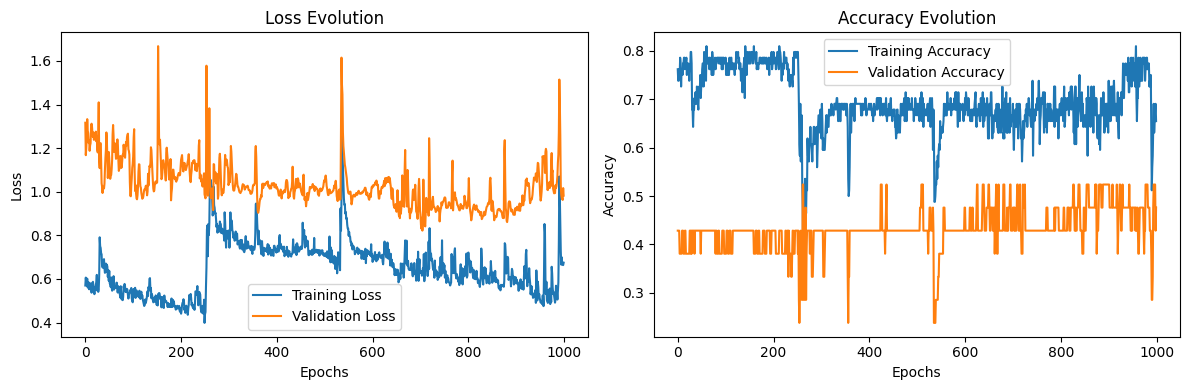

In [9]:
import matplotlib.pyplot as plt

# 손실 그래프
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Evolution')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Evolution')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
x = len(X_train)
x

75

In [10]:
X_train[0].shape

(517, 51)

In [11]:
y_train[0].shape

()

In [12]:
X_train[0].shape[1]

51

In [10]:
y_test = np.array(y_test)

# 모델 평가

X_test = [x.to_numpy() if isinstance(x, pd.DataFrame) else x for x in X_test]
X_test_padded = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='post', dtype='float32')

y_test = np.array(y_test)

loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

1/1 [==============================] - 1s 910ms/step - loss: 2.8130 - accuracy: 0.2727
Test Accuracy: 27.27%


In [10]:
# 모델 저장
model.save('walk_classification_model.h5')

C:\Users\GAILAB\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
